Importing required libraries and mouting google drive to read the csv file

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re # regular expression libary.
import nltk # Natural Language toolkit
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

import csv
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv ("/content/drive/MyDrive/tripadvisor_hotel_reviews.csv")
print (df)

Mounted at /content/drive
                                                  Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]


In [2]:
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [3]:
print('Total rows: {}'.format(len(df)))

Total rows: 20491


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

Text(0.5, 1.0, 'Distribution of Rating')

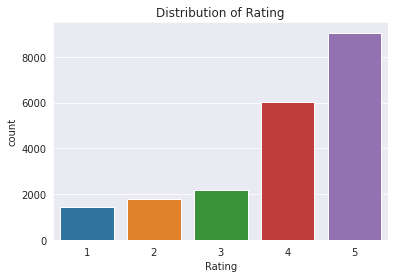

In [6]:
#Visualize Rating Score Distribution
sns.set_style(style="darkgrid")
ax = sns.countplot(x='Rating', data=df)
plt.title('Distribution of Rating')

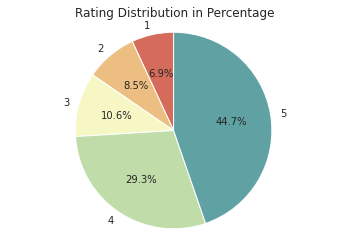

In [7]:
#1-5 Rating Distribution (Percentage)
labels= ['1', '2', '3', '4','5']

colors=['#D56C5B', '#ECBE81', '#F7F7C6', '#C0DCA9', '#60A2A3']

sizes= [1355, 1667, 2068, 5739, 8760]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.title("Rating Distribution in Percentage")

plt.show()

In [8]:
from wordcloud import WordCloud, STOPWORDS

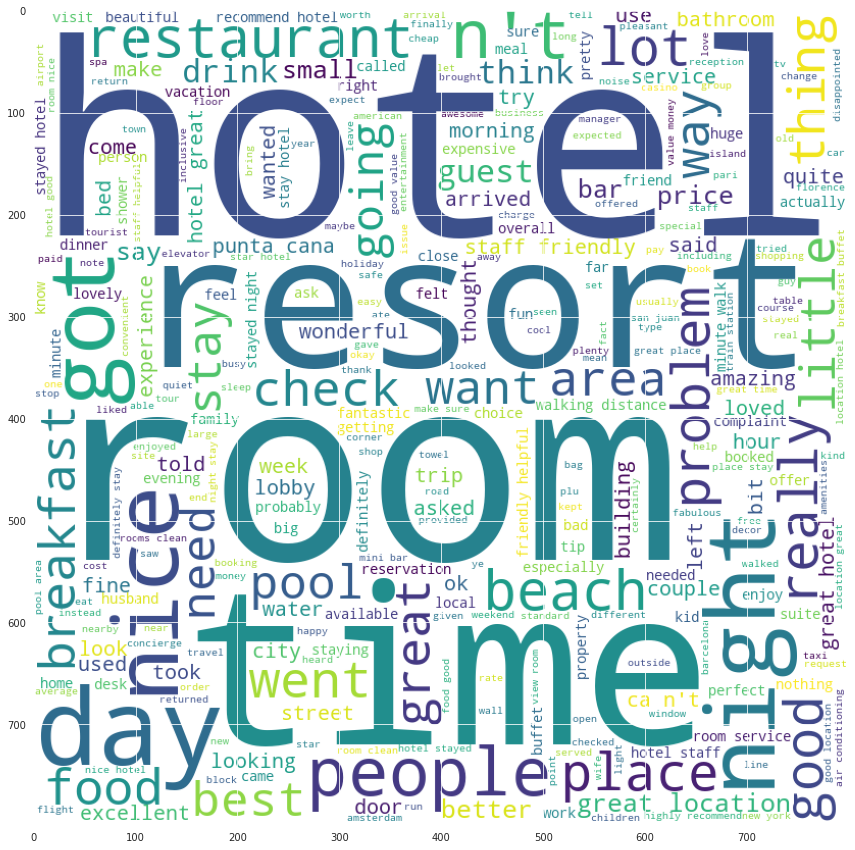

In [9]:
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="white").generate(' '.join(df['Review']))

plt.imshow(wc1)

In [10]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3204a02429ff98fb7df1de4f240e1ea3a3c0350ea7149289819b9ae0ca17a996
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=4f6774fb6d84ec991f6ca02f0ca877badd41c1960678281f33fbee0f43571ce3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [11]:
pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 63.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [12]:
pip install -U pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#Prepare the model
import re
import string

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [14]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [15]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
df.dropna(axis = 0, how ='any',inplace=True) 


df['Review'] = df['Review'].apply(clean_text)
df['Num_words_text'] = df['Review'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(df['Rating'].value_counts())
print(len(df))
print('-------------------------')
max_review_data_sentence_length  = df['Num_words_text'].max()


print('No of Short reviews')

-------Dataset --------
5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64
20491
-------------------------
No of Short reviews


In [ ]:
#pre-process

In [17]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords
df['Review']=df['Review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import spacy

In [20]:
!python -m spacy download en_core_web_sm

2022-08-26 05:14:42.161804: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [22]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [23]:
text_list=df['Review'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like couch desk clerk told mixed suites description kimpton website sorry free breakfast kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution send email trip guest survey follow email mail guess tell concerned guestthe staff ranged indifferent helpful asked desk good breakfast spots neighborhood hood told hotels best breakfast spots seattle block away convenient hotel know exist arrived late night inside bellman busy chating cell phone help bagsprior arrival emailed hotel inform 20th anniversary half rea

In [ ]:
#Create vocabulary dictionary and document term matrix

In [24]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [25]:
from gensim.models import LdaModel

In [26]:
from gensim import models

In [27]:
import pyLDAvis.gensim_models

In [28]:
# Creating the object for LDA model using gensim library
#LDA = gensim.models.lda_model.LdaModel

# Build LDA model
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=100, passes=50,iterations=100)

In [29]:
lda_model.print_topics()

[(0,
  '0.067*"beach" + 0.062*"resort" + 0.047*"pool" + 0.047*"good" + 0.026*"great" + 0.025*"water" + 0.023*"people" + 0.021*"nice" + 0.020*"restaurant" + 0.015*"drink"'),
 (1,
  '0.032*"food" + 0.031*"great" + 0.030*"beautiful" + 0.026*"staff" + 0.021*"time" + 0.021*"service" + 0.020*"wonderful" + 0.018*"fantastic" + 0.017*"restaurant" + 0.015*"trip"'),
 (2,
  '0.029*"hotel" + 0.020*"service" + 0.018*"food" + 0.018*"time" + 0.015*"room" + 0.014*"staff" + 0.012*"hour" + 0.010*"people" + 0.009*"guest" + 0.009*"thing"'),
 (3,
  '0.149*"hotel" + 0.052*"great" + 0.041*"location" + 0.040*"good" + 0.030*"staff" + 0.028*"room" + 0.022*"breakfast" + 0.020*"clean" + 0.018*"nice" + 0.018*"friendly"'),
 (4,
  '0.080*"room" + 0.020*"night" + 0.017*"hotel" + 0.016*"area" + 0.013*"nice" + 0.012*"small" + 0.012*"floor" + 0.011*"bathroom" + 0.009*"good" + 0.009*"breakfast"')]

In [30]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.030875  0.237969       1        1  34.687405
2     -0.189784  0.000641       2        1  22.059270
3      0.054101  0.125376       3        1  19.832087
1     -0.159931 -0.245722       4        1  13.092380
0      0.326490 -0.118265       5        1  10.328858, topic_info=         Term          Freq         Total Category  logprob  loglift
23      hotel  50092.000000  50092.000000  Default  30.0000  30.0000
3617    beach   8327.000000   8327.000000  Default  29.0000  29.0000
3574   resort   7655.000000   7655.000000  Default  28.0000  28.0000
20      great  20518.000000  20518.000000  Default  27.0000  27.0000
43       room  43801.000000  43801.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
139     thing    791.027074   4737.869684   Topic5  -5.0551   0.4802
250    family    611.510717   2185.816444   Topic5  -5.3125   0.9964
412       day    614.828180   3495.451293   Topic5  -5.3071   0.5324
272   problem    592.555167   4269.135724   Topic5  -5.3440   0.2955
267     place    583.502500   7863.832529   Topic5  -5.3594  -0.3308

[321 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
285       1  0.999719        access
232       5  0.998882      activity
434       2  0.999789       airport
3870      5  0.995894  allinclusive
707       5  0.998360          alot
...     ...       ...           ...
963       2  0.998338         wrong
534       1  0.102255          year
534       2  0.330806          year
534       3  0.039616          year
534       4  0.527530          year

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])